In [1]:
from pfio import pfread
import numpy as np
from glob import glob
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
def get_file_list(file_pattern, input_file_path='.'):
    # generate the list of input files
    input_files = sorted(glob(os.path.join(input_file_path, file_pattern)))
    return input_files

In [3]:
forcings_folder = '/scratch/arezaii/WRF/wy2015'
wrf_pattern = 'WRF.APCP.*.pfb'

In [4]:
forcing_files = get_file_list(wrf_pattern, forcings_folder )

In [5]:
%time days = np.concatenate([pfread(forcing_file) for forcing_file in forcing_files])

CPU times: user 2min 42s, sys: 59.3 s, total: 3min 42s
Wall time: 3min 56s


In [6]:
num_days = len(forcing_files)
num_x = days.shape[2]
num_y = days.shape[1]

In [7]:
x_coords = range(0,num_x)
y_coords = range(0,num_y)
time_coords = pd.date_range('2014-10-01', periods=(num_days*24), freq='H')

In [8]:
%time data = xr.DataArray(days, dims=('time','y','x',), coords={'x':x_coords, 'y':y_coords,'time': time_coords })
data.attrs['long_name'] = 'precipitation'
data.attrs['units'] = 'mm/hr'

CPU times: user 1.18 ms, sys: 63 µs, total: 1.24 ms
Wall time: 1.24 ms


In [9]:
data

<xarray.DataArray (time: 8760, y: 736, x: 704)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.22920106e-02,  1.02721027e-02,  8.31440302e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.98687464e-02,  1.75023551e-02,  1.52747089e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.83726944e-02,  2.46274173e-02,  2.21034739e-02]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  2.13815241e-08,  3.44959048e-08],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          7.18654813e-09,  5.38559691e-08,  8.97962169e-08],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          7.97170351e-08,  9.78734349e-08,  1.55830696e-07]],

       ...,

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.9990000

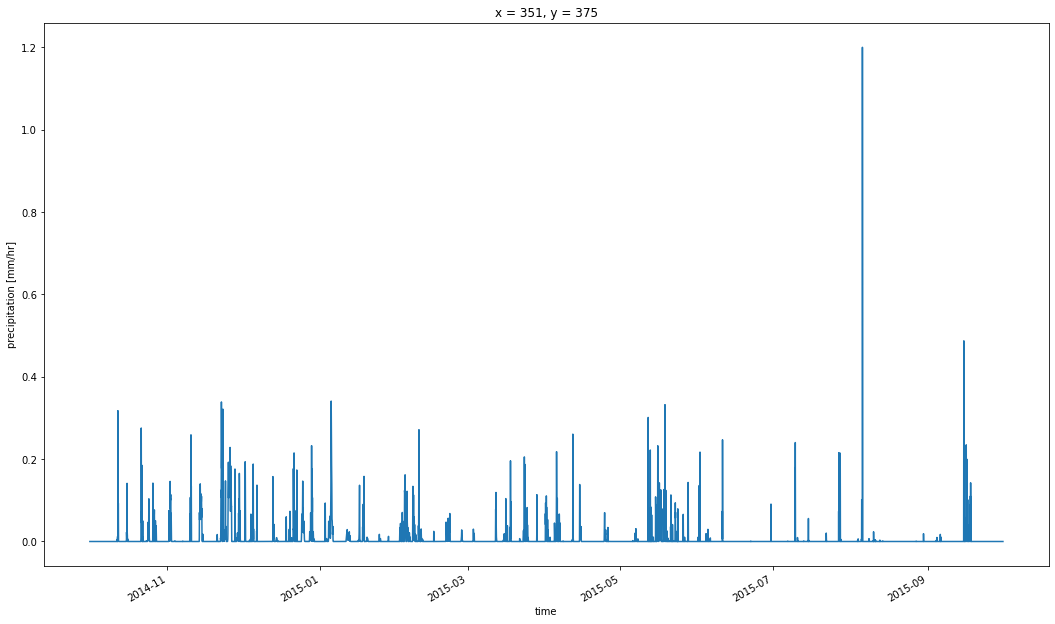

In [10]:
data[:,375,351].plot(figsize=(18,10))

In [11]:
%time data[:,375,351].mean(dim='time', keep_attrs=True)

CPU times: user 2.3 ms, sys: 111 µs, total: 2.41 ms
Wall time: 1.85 ms


<xarray.DataArray ()>
array(0.00616068)
Coordinates:
    x        int64 351
    y        int64 375
Attributes:
    long_name:  precipitation
    units:      mm/hr

In [12]:
%time day_avg = data[:,375,351].groupby("time.dayofyear").mean(dim='time', keep_attrs=True)

CPU times: user 118 ms, sys: 7.84 ms, total: 125 ms
Wall time: 125 ms


In [13]:
day_avg

<xarray.DataArray (dayofyear: 365)>
array([0.00000000e+00, 3.98808255e-07, 9.33774285e-03, 1.94681235e-02,
       1.15929791e-01, 4.89350833e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.30715906e-03, 8.40940648e-03,
       6.87374320e-04, 0.00000000e+00, 0.00000000e+00, 2.23001651e-02,
       2.95112880e-04, 2.74513014e-02, 1.70217462e-03, 7.24872907e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.47593622e-03,
       5.53828066e-04, 0.00000000e+00, 0.00000000e+00, 1.45322047e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.21761314e-03,
       8.02091772e-03, 3.03033326e-02, 3.91635056e-02, 9.66404350e-03,
       4.98273383e-04, 4.14504777e-02, 1.24913994e-03, 3.25234787e-02,
       3.59601582e-03, 3.96800808e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14629982e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.11847974e-03, 2.60314307e-02,
       7.20024508e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.23980282e-03, 1.19687222e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.43042293e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.16118972e-02, 0.00000000e+00,
       0.00000000e+00, 4.04364532e-03, 1.25828464e-02, 3.45353227e-03,
       1.99990439e-02, 0.00000000e+00, 0.00000000e+00, 4.97138569e-04,
       0.00000000e+00, 2.77290332e-02, 1.19127111e-02, 8.96344519e-04,
       0.00000000e+00, 0.00000000e+00, 5.42692124e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.49653178e-02, 2.22920522e-03,
       1.08514823e-05, 4.36068759e-03, 3.91222241e-02, 1.56550539e-02,
       0.00000000e+00, 5.21268560e-05, 0.00000000e+00, 0.00000000e+00,
       5.80047402e-04, 1.83438180e-02, 0.00000000e+00, 1.45915822e-02,
       6.89127540e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.22826421e-02, 4.35088585e-03, 4.87638708e-03,
       6.83194709e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.41212983e-06,
       1.88119615e-05, 2.25641564e-03, 2.54435807e-03, 3.74563411e-04,
       0.00000000e+00, 0.00000000e+00, 1.10326651e-06, 2.04431252e-02,
       1.55925083e-02, 6.12683806e-04, 2.08584714e-02, 4.06196894e-02,
       1.23667652e-02, 4.67593689e-02, 1.79752518e-02, 7.11286590e-04,
       1.25134348e-02, 4.85631196e-04, 1.06259400e-02, 3.44679230e-03,
       4.28378694e-07, 3.65109023e-03, 1.03679493e-04, 1.23071307e-02,
       0.00000000e+00, 0.00000000e+00, 8.90082954e-06, 1.67873289e-02,
       0.00000000e+00, 3.41294338e-06, 1.31018884e-03, 2.28813888e-03,
       3.62584930e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.71580509e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.35257113e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.79781840e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.31451594e-05, 2.76230989e-05,
       0.00000000e+00, 2.25043816e-02, 1.26426174e-03, 1.27620841e-04,
       2.23275884e-06, 1.02871994e-04, 0.00000000e+00, 2.75721183e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.02165488e-07,
       0.00000000e+00, 0.00000000e+00, 9.12210681e-04, 1.76559647e-06,
       5.27618295e-06, 0.00000000e+00, 0.00000000e+00, 3.84860907e-02,
       2.34558198e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.61456313e-04, 4.98297783e-04,
       9.29960496e-02, 2.13931902e-07, 0.00000000e+00, 4.82487886e-04,
       0.00000000e+00, 1.27499656e-03, 1.27917452e-04, 2.47

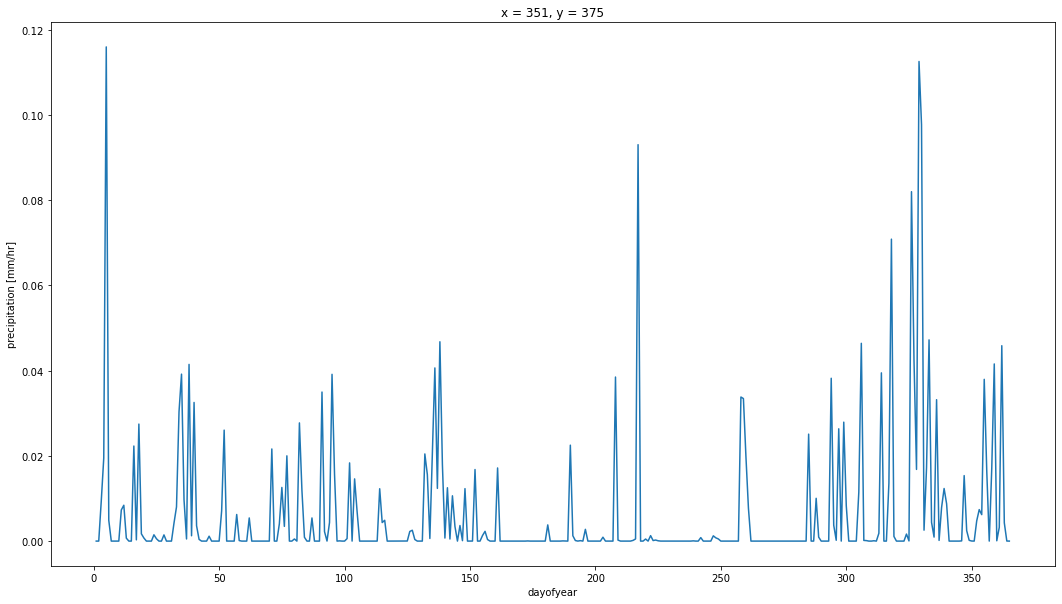

In [14]:
day_avg.plot(figsize=(18,10))